### 1. Initializing Project and Reading Data From CSV Files 
In order to implement perceptron network, we need some libraries and packages:

- **numpy**: we use this library to calculate complex matrix operation
- **matplotlib**: this is a plotting library, here we use it in plotting **classification graph** and **test case accuracy graph** 
- **network**: this is a project that contains all source code and implemented neural networks.

**The source code of this particular project implemented in the src/network/perceptron.py**

We are using a CSV dataset for this network: \
This dataset includes **2 inputs**, **bias** and **target** value. **(perceptron.csv)** \
Second on is for testing if our training process was successful or not. **(test_dataset.csv)**. \
All datasets exists in the **dataset** folder with CSV format.

**Here we are using binary input and bipolar target.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from network import PerceptronNetwork

training_dataset = np.genfromtxt("../dataset/perceptron.csv", delimiter=',', skip_header=1)

### 2. Train The Networks
Now we train our perceptron network using train() function of PerceptronNetwork class implemented in **perceptron.py** in **src/projects**. \
Here we are using learning_rate=0.2 and treshold(θ)=0.2, which can be easily changed.

Also we pass the initial weights and bias to network: 

network1:  <bias, w1, w2> = < 0.2, 5.1, 2.3> \
network2:  <bias, w1, w2> = < 1.0, 1.0, 1.0>

Note that using `weights_changed()` method, we simply check if the network converged to final weights or not. 

In [2]:
network1 = PerceptronNetwork(input_count=2, learning_rate=0.5, threshold=0.2, bias=0.2, weights=[5.1, 2.3])

epoch1 = 1
while epoch1 != 500:
    old_bias = network1.bias
    old_weights = network1.w.copy()

    for vector in training_dataset:
        network1.train(x=vector[:2], bias=0.2, target=vector[2])

    if not network1.weights_changed(old_weights, old_bias):
        break
    
    epoch1 += 1 
    
f"The number of epochs in which the algorithm converged to the final weights: {epoch1}"

'The number of epochs in which the algorithm converged to the final weights: 154'

In [3]:
network2 = PerceptronNetwork(input_count=2, learning_rate=0.5, threshold=0.2, bias=1.0, weights=[1.0, 1.0])

epoch2 = 1
while epoch2 != 500:
    old_bias = network2.bias
    old_weights = network2.w.copy()
    
    for vector in training_dataset:
        network2.train(x=vector[:2], bias=1.0, target=vector[2])

    if not network2.weights_changed(old_weights, old_bias):
        break
    
    epoch2 += 1 
    
f"The number of epochs in which the algorithm converged to the final weights: {epoch2}"

'The number of epochs in which the algorithm converged to the final weights: 58'

### 3. Printing final weights and bias

In [4]:
f"Network1 weights: {network1.w} and bias: {network1.bias}"

'Network1 weights: [1.5999999999999996, 3.750000000000002] and bias: -8.599999999999985'

In [5]:
f"Network2 weights: {network2.w} and bias: {network2.bias}"

'Network2 weights: [2.5, 5.900000000000001] and bias: -13.5'

### 3. (a) Plotting Decision Regions - Network1
In this part we have correct weights for our network \
All we need is line that separate decision regions. \
This line is x2 = b + w1x1 / -w2x2 for 2 inputs.

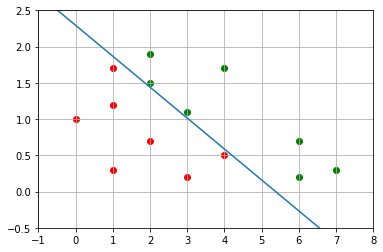

In [6]:
x1 = np.array([-1, 8]) # a line from x=-1 to x=8
x2 = (network1.bias + network1.w[0] * x1) / (- network1.w[1]) # x2 = b + w1x1 / -w2x2

plt.plot(x1, x2)
for vector in training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negative area (red points)
    if vector[2] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-1, 8)
plt.ylim(-0.5, 2.5)
plt.show()

### 3. (b) Plotting Decision Regions - Network2

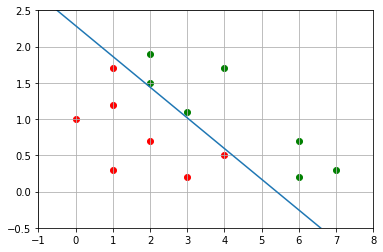

In [7]:
x1 = np.array([-1, 8]) # a line from x=-1 to x=8
x2 = (network2.bias + network2.w[0] * x1) / (- network2.w[1]) # x2 = b + w1x1 / -w2x2

plt.plot(x1, x2)
for vector in training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negative area (red points)
    if vector[2] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()

plt.xlim(-1, 8)
plt.ylim(-0.5, 2.5)
plt.show()